In [115]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import re,json,nltk

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

from tensorflow.keras.preprocessing.text import Tokenizer



class color: # Text style

   PURPLE = '\033[95m'

   CYAN = '\033[96m'

   DARKCYAN = '\033[36m'

   BLUE = '\033[94m'

   GREEN = '\033[92m'

   YELLOW = '\033[93m'

   RED = '\033[91m'

   BOLD = '\033[1m'

   UNDERLINE = '\033[4m'

   END = '\033[0m'


In [116]:
import re

from nltk.tokenize import word_tokenize

import nltk

from nltk.tokenize import word_tokenize

import re

import string

from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords



import nltk

nltk.download('all')









# Download the 'punkt' tokenizer

nltk.download('punkt')

from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

nltk.download('stopwords')

nltk.download('punkt')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package ave

True

In [117]:
Train = pd.read_excel('/kaggle/input/augmented-dataset/train.xlsx')
Test = pd.read_excel('/kaggle/input/augmented-dataset/test.xlsx')
Validation = pd.read_excel('/kaggle/input/augmented-dataset/dev.xlsx')



In [118]:
Validation

,Review,label
0,পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শ...,0
1,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,0
2,সঠিক তদন্ত করতে হবে বিচারের আওতায় আনতে হবে যে...,0
3,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,0
4,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,1
...,...,...
1325,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...,1
1326,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...,1
1327,জে ছেলে মারা গেছে ওর কি হবে,0
1328,এরাই নৈরাজ্য সৃষ্টি করছে,1


In [119]:
Train.rename(columns={'Review': 'text'}, inplace=True)
Test.rename(columns={'Review': 'text'}, inplace=True)
Validation.rename(columns={'Review': 'text'}, inplace=True)


In [120]:

# Extract the texts and labels
Train_texts = Train['text'].values
Test_texts = Test['text'].values
Validation_texts = Validation['text'].values


Train_labels = Train['label'].values
Test_labels = Test['label'].values
Validation_labels = Validation['label'].values

In [121]:
reviews_lines1=list()
Train_reviews_lines = list()
lines= Train['text'].values.tolist()

for line in lines:

  tokens=word_tokenize(line)

  reviews_lines1.append(tokens)
  Train_reviews_lines.append(tokens)

In [122]:
Test_reviews_lines = list()
lines= Test['text'].values.tolist()

for line in lines:
  tokens=word_tokenize(line)

  reviews_lines1.append(tokens)
  Test_reviews_lines.append(tokens)

In [123]:
Val_reviews_lines = list()
lines= Validation['text'].values.tolist()

for line in lines:
  tokens=word_tokenize(line)

  reviews_lines1.append(tokens)
  Val_reviews_lines.append(tokens)

In [124]:
len(reviews_lines1)

8746

In [125]:
len(Test_reviews_lines)

2016

In [126]:
# !pip install glove-python3

In [127]:
from sklearn.preprocessing import LabelEncoder

from keras.utils import to_categorical



# Initialize the label encoder

label_encoder = LabelEncoder()



# Convert string labels (e.g., 'A', 'B', etc.) to integers

train_labels = label_encoder.fit_transform(Train_labels)
test_labels = label_encoder.fit_transform(Test_labels)
val_labels = label_encoder.fit_transform(Validation_labels)



# Now convert the integer labels to one-hot encoding

y_train = to_categorical(train_labels, num_classes=3)  # Assuming 5 classes
y_test = to_categorical(test_labels, num_classes=3)  # Assuming 5 classes
y_val = to_categorical(val_labels, num_classes=3)  # Assuming 5 classes


# Check if the labels have been correctly transformed

print(f"Encoded labels: {train_labels}")

print(f"One-hot encoded labels shape: {train_labels.shape}")

Encoded labels: [0 0 0 ... 0 0 2]
One-hot encoded labels shape: (5400,)


In [128]:
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np



# Initialize the Tokenizer

tokenizer_obj = Tokenizer()

tokenizer_obj.fit_on_texts(reviews_lines1)



# Convert texts to sequences of integers

train_sequences = tokenizer_obj.texts_to_sequences(Train_reviews_lines)
test_sequences = tokenizer_obj.texts_to_sequences(Test_reviews_lines)
val_sequences = tokenizer_obj.texts_to_sequences(Val_reviews_lines)



# Define maximum length for padding

max_length = 100



word_index=tokenizer_obj.word_index



# Pad sequences to ensure uniform input size

X_train_pad = pad_sequences(train_sequences, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(test_sequences, maxlen=max_length, padding='post')
X_val_pad = pad_sequences(val_sequences, maxlen=max_length, padding='post')






print("Training content shape:", X_train_pad.shape)

print("Training language shape:", y_train.shape)


Training content shape: (5400, 100)
Training language shape: (5400, 3)


In [129]:
print(X_train_pad.shape)
print(y_train.shape)
print(X_val_pad.shape)
print(y_val.shape)
print(X_test_pad.shape)
print(y_test.shape)

(5400, 100)
(5400, 3)
(1330, 100)
(1330, 3)
(2016, 100)
(2016, 3)


In [130]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [131]:
import gensim

# Define embedding dimension
EMBEDDING_DIM = 200

from gensim.models import Word2Vec
model = Word2Vec(reviews_lines1, vector_size=200, window=3, min_count=2, workers=4, sg=0)





In [132]:
filename = '/kaggle/working/WC.txt'
model.wv.save_word2vec_format(filename, binary=False)

# **Load the Trained Embedding Models**

In [133]:
!mkdir ROC_Curve
!mkdir Confusion_Matrix
!mkdir Auc
!mkdir loss

mkdir: cannot create directory ‘ROC_Curve’: File exists
mkdir: cannot create directory ‘Confusion_Matrix’: File exists
mkdir: cannot create directory ‘Auc’: File exists
mkdir: cannot create directory ‘loss’: File exists


In [134]:
import os

file_identifier = "WC"



Final_model_path= f"/kaggle/working/{file_identifier}.xlsx"
Roc_path =  f"/kaggle/working/ROC_Curve/{file_identifier}.pdf"
Con_path = f"/kaggle/working/Confusion_Matrix/{file_identifier}.pdf"
auc_path = f"/kaggle/working/Auc/{file_identifier}.pdf"
loss_path = f"/kaggle/working/loss/{file_identifier}.pdf"

embedding_index={}

f = open(f"/kaggle/working/WC.txt",encoding='utf-8')
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:])
  embedding_index[word]=coefs

f.close()

In [135]:
EMBEDDING_DIM=200
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,EMBEDDING_DIM))

for word, i in word_index.items():
  if i>num_words:
    continue
  embedding_vector=embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

In [136]:
num_words

19200

In [137]:
EMBEDDING_DIM

200

In [138]:
max_length

100

In [139]:
X_train_pad[5]

array([ 500,  223,   69,  379, 1411, 4077, 1412,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [140]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16653402, -0.17156602, -0.04520294, ..., -0.2359393 ,
         0.01168123, -0.18951684],
       [ 0.18463303, -0.18147866, -0.03045305, ..., -0.26267746,
         0.01904681, -0.15240836],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [141]:
num_classes = 3

# **CNN**

In [142]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


def build_model():
    num_classes = 3         # Number of classes for classification
    filters = 128           # Number of filters in the Conv1D layer
    kernel_sizes = [3, 4, 5]  # Kernel sizes for Conv1D

    # Input layer
    input = Input(shape=(max_length,), dtype='int32')

    # Add embedding layer
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=EMBEDDING_DIM,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input)  # Apply the input tensor here

    # Convolutional and Max-Pooling layers
    conv_pools = []
    for kernel_size in kernel_sizes:
        conv = Conv1D(filters=filters,
                      kernel_size=kernel_size,
                      activation='relu')(embedding_layer)
        pool = MaxPooling1D(pool_size=max_length - kernel_size + 1)(conv)
        conv_pools.append(pool)

    # Concatenate pooled features
    concat = tf.keras.layers.concatenate(conv_pools, axis=-1)

    # Flatten and add fully connected layers
    flat = Flatten()(concat)
    dense = Dense(128, activation='relu')(flat)
    output = Dense(num_classes, activation='softmax')(dense)

    # Create and compile the model
    model = Model(inputs=input, outputs=output)

    optimizer = Adam(learning_rate=0.0001)

    model.compile(optimizer= optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model





In [143]:
model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_12 (Embedding)  │ (None, 100, 200)       │      3,840,000 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_12 (Conv1D)        │ (None, 98, 128)        │         76,928 │ embedding_12[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_13 (Conv1D)        │ (None, 97, 128)        │        102,528 │ embedding_12[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_14 (Conv1D)        │ (None, 96, 128)        │        128,128 │ embedding_12[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_12          │ (None, 1, 128)         │              0 │ conv1d_12[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_13          │ (None, 1, 128)         │              0 │ conv1d_13[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_14          │ (None, 1, 128)         │              0 │ conv1d_14[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 1, 384)         │              0 │ max_pooling1d_12[0][0… │
│ (Concatenate)             │                        │                │ max_pooling1d_13[0][0… │
│                           │                        │                │ max_pooling1d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 384)            │              0 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_24 (Dense)          │ (None, 128)            │         49,280 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 3)              │            387 │ dense_24[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,197,251 (16.01 MB)

 Trainable params: 357,251 (1.36 MB)

 Non-trainable params: 3,840,000 (14.65 MB)

In [144]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


model = build_model()
history_cnn= model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")

Epoch 1/30
169/169 - 4s - 27ms/step - accuracy: 0.5106 - loss: 0.9746 - val_accuracy: 0.5083 - val_loss: 0.9667
Epoch 2/30
169/169 - 1s - 4ms/step - accuracy: 0.5211 - loss: 0.9403 - val_accuracy: 0.5406 - val_loss: 0.9249
Epoch 3/30
169/169 - 1s - 3ms/step - accuracy: 0.5356 - loss: 0.9165 - val_accuracy: 0.5519 - val_loss: 0.9029
Epoch 4/30
169/169 - 1s - 3ms/step - accuracy: 0.5400 - loss: 0.8976 - val_accuracy: 0.5564 - val_loss: 0.8917
Epoch 5/30
169/169 - 1s - 3ms/step - accuracy: 0.5548 - loss: 0.8853 - val_accuracy: 0.5541 - val_loss: 0.8902
Epoch 6/30
169/169 - 1s - 4ms/step - accuracy: 0.5596 - loss: 0.8761 - val_accuracy: 0.5556 - val_loss: 0.8849
Epoch 7/30
169/169 - 1s - 3ms/step - accuracy: 0.5624 - loss: 0.8696 - val_accuracy: 0.5293 - val_loss: 0.9157
Epoch 8/30
169/169 - 1s - 4ms/step - accuracy: 0.5630 - loss: 0.8617 - val_accuracy: 0.5511 - val_loss: 0.9066
Epoch 9/30
169/169 - 1s - 3ms/step - accuracy: 0.5772 - loss: 0.8466 - val_accuracy: 0.5767 - val_loss: 0.8655


In [145]:
start_time = time.time()

score,acc=model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5745 - loss: 0.8270
Elapsed time: 0.5791013240814209 seconds
Test Score: 0.8012354969978333
Accuracy: 0.5927579402923584


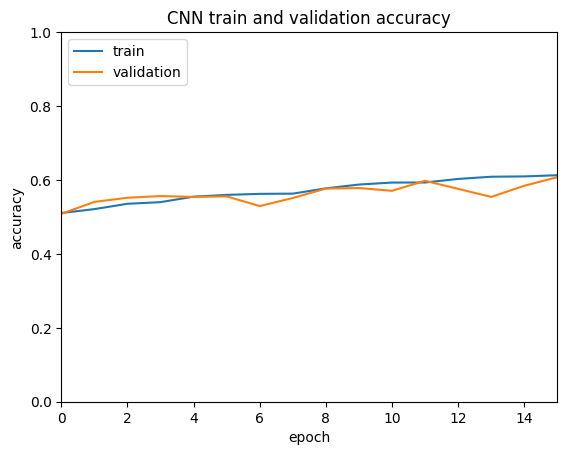

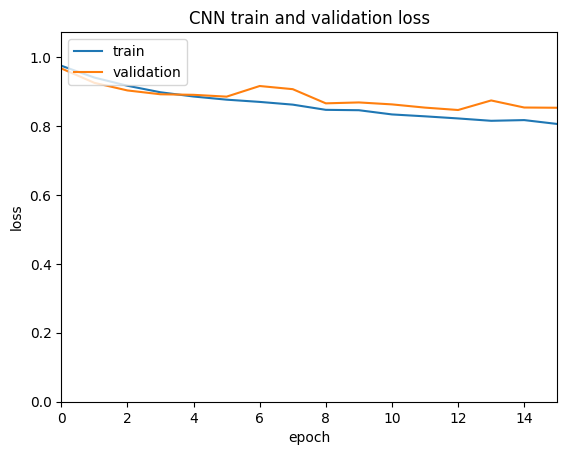

In [146]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(0, 1)  # Set y-axis limits to the full range (0 to 1)
plt.xlim(0, len(history_cnn.history['accuracy']) - 1)  # Set x-axis limits to epochs
plt.show()


plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(0, max(max(history_cnn.history['loss']), max(history_cnn.history['val_loss'])) * 1.1)  # Adjust y-axis limits
plt.xlim(0, len(history_cnn.history['loss']) - 1)  # Set x-axis limits to epochs
plt.show()



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


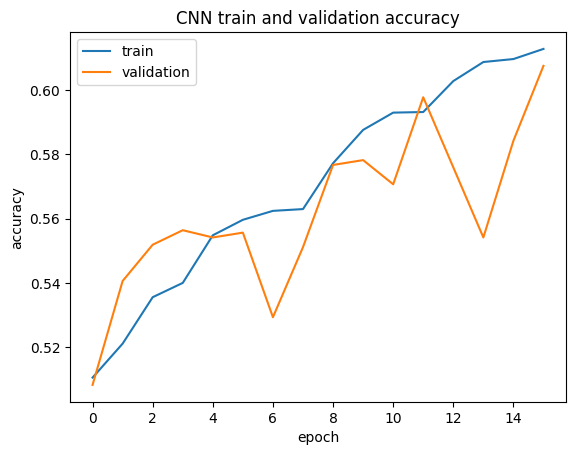

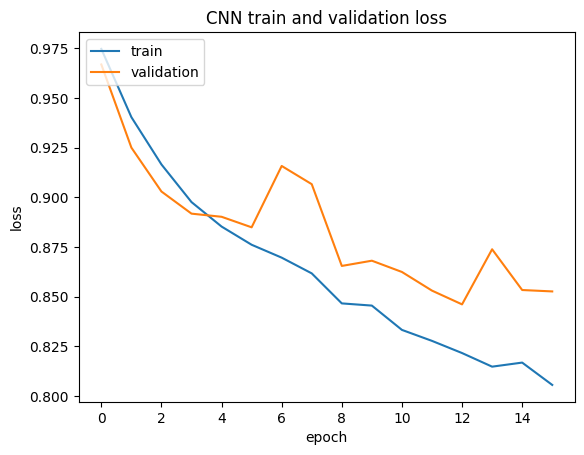

In [147]:
print(history_cnn.history.keys())
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [148]:
# integer_label = 3
# original_label = label_encoder.inverse_transform([integer_label])
# print(original_label[0])

In [149]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
                  precision    recall  f1-score   support

    Non-Violence     0.6085    0.8394    0.7055      1096
Passive Violence     0.5369    0.3338    0.4117       719
 Direct Violence     0.6140    0.1741    0.2713       201

        accuracy                         0.5928      2016
       macro avg     0.5865    0.4491    0.4628      2016
    weighted avg     0.5835    0.5928    0.5574      2016



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


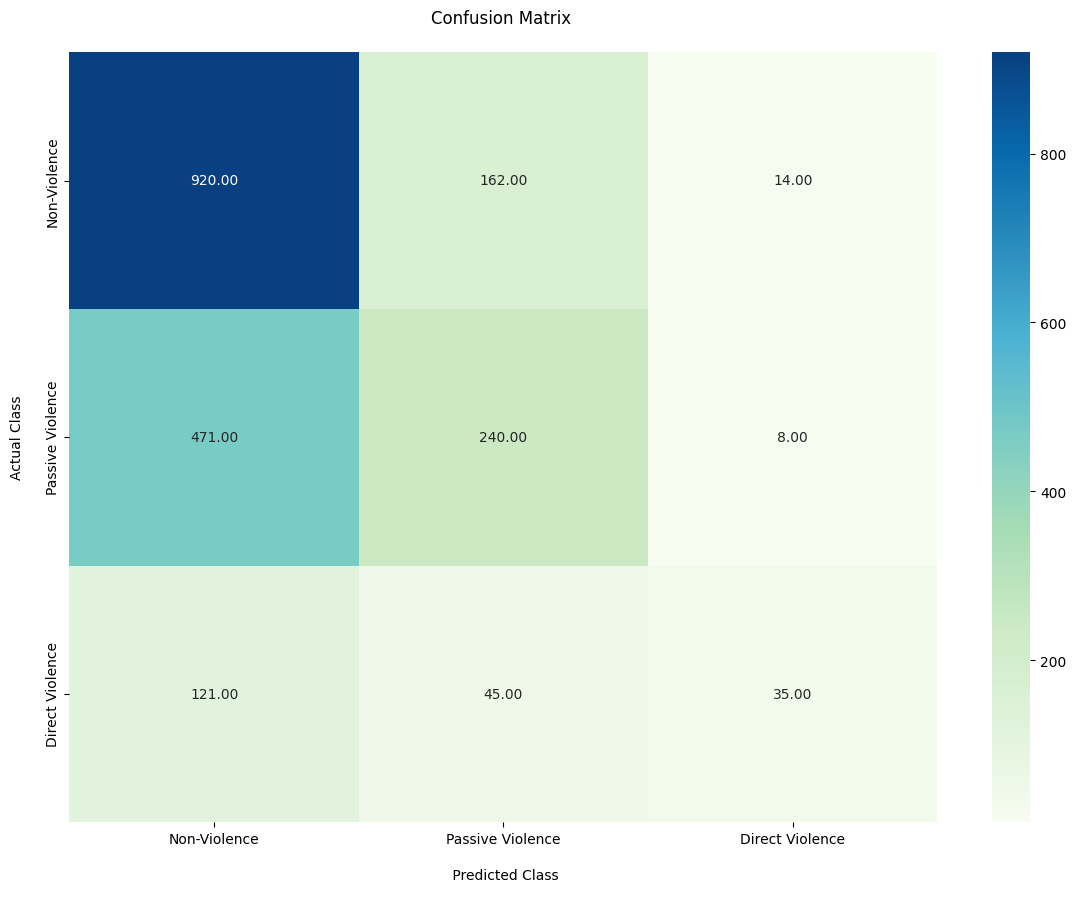

In [150]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Class\n')
fx.set_ylabel('Actual Class\n');
fx.xaxis.set_ticklabels(['Non-Violence', 'Passive Violence', 'Direct Violence'])
fx.yaxis.set_ticklabels(['Non-Violence', 'Passive Violence', 'Direct Violence'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


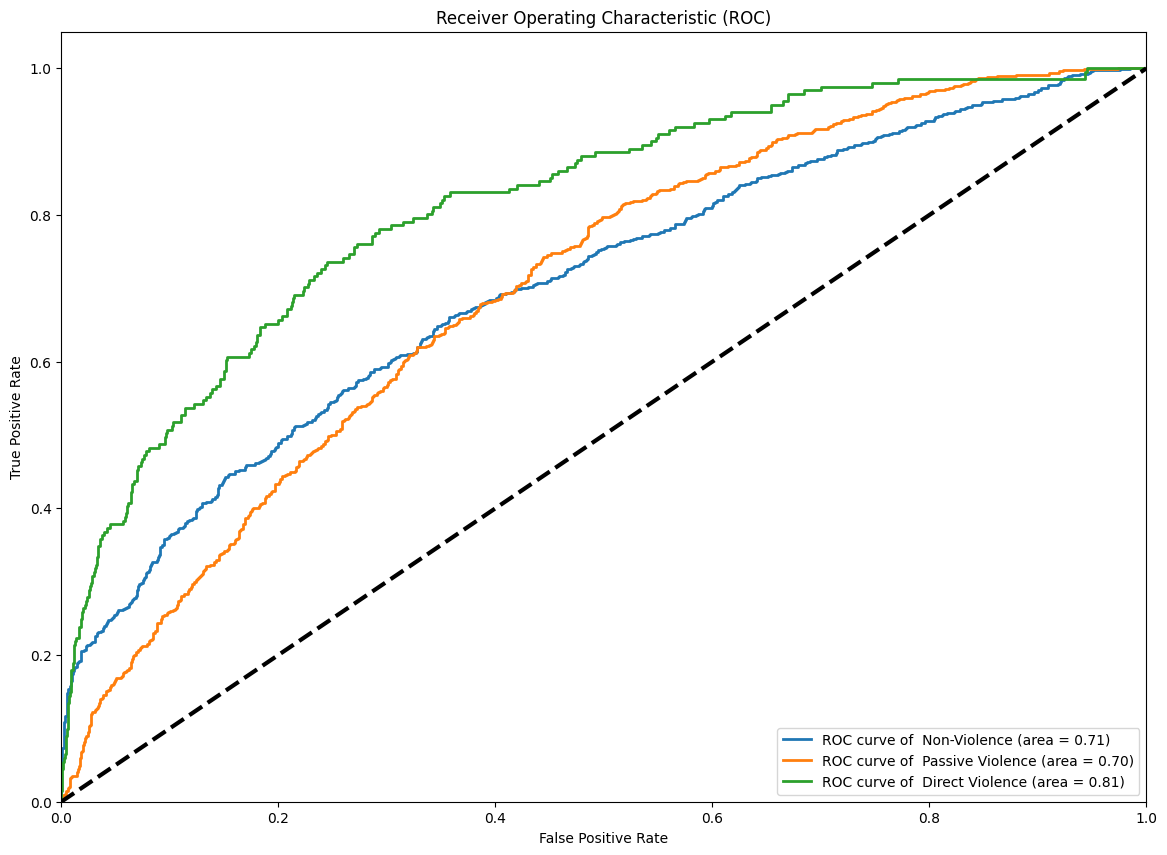

In [151]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = model.predict(X_test_pad)




# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [152]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'CNN'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



CNN_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
CNN_df = CNN_df.set_index('Metric').T

CNN_df



Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
CNN,0.592758,0.586471,0.449114,0.462834,0.801235,13.606778,0.579101


> LSTM

In [153]:
embedding_dim = EMBEDDING_DIM

In [154]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam

def build_lstm_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # LSTM layer
    lstm = LSTM(128, return_sequences=False)(embedding_layer)

    # Fully connected layer
    dense = Dense(128, activation='relu')(lstm)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [155]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_lstm_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 22ms/step - accuracy: 0.5159 - loss: 1.0277 - val_accuracy: 0.5391 - val_loss: 0.9813
Epoch 2/30
169/169 - 1s - 7ms/step - accuracy: 0.5143 - loss: 0.9925 - val_accuracy: 0.5391 - val_loss: 0.9805
Epoch 3/30
169/169 - 1s - 7ms/step - accuracy: 0.5148 - loss: 0.9938 - val_accuracy: 0.5391 - val_loss: 0.9851
Epoch 4/30
169/169 - 1s - 7ms/step - accuracy: 0.5143 - loss: 0.9910 - val_accuracy: 0.5391 - val_loss: 0.9785
Epoch 5/30
169/169 - 1s - 7ms/step - accuracy: 0.5148 - loss: 0.9918 - val_accuracy: 0.5368 - val_loss: 0.9814
Epoch 6/30
169/169 - 1s - 7ms/step - accuracy: 0.5139 - loss: 0.9845 - val_accuracy: 0.5368 - val_loss: 0.9558
Epoch 7/30
169/169 - 1s - 7ms/step - accuracy: 0.5178 - loss: 0.9681 - val_accuracy: 0.5361 - val_loss: 0.9526
Epoch 8/30
169/169 - 1s - 7ms/step - accuracy: 0.5207 - loss: 0.9602 - val_accuracy: 0.5406 - val_loss: 0.9736
Epoch 9/30
169/169 - 1s - 7ms/step - accuracy: 0.5213 - loss: 0.9622 - val_accuracy: 0.5368 - val_loss: 0.9425
Epoch 10/30

In [156]:
start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4926 - loss: 0.9478
Elapsed time: 0.12252664566040039 seconds
Test Score: 0.9227759838104248
Accuracy: 0.5476190447807312


In [157]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                  precision    recall  f1-score   support

    Non-Violence     0.5534    0.9690    0.7045      1096
Passive Violence     0.0000    0.0000    0.0000       719
 Direct Violence     0.4330    0.2090    0.2819       201

        accuracy                         0.5476      2016
       macro avg     0.3288    0.3926    0.3288      2016
    weighted avg     0.3440    0.5476    0.4111      2016



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'LSTM'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



LSTM_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
LSTM_df = LSTM_df.set_index('Metric').T

LSTM_df



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
LSTM,0.547619,0.328801,0.392644,0.328786,0.922776,17.467396,0.122527


**BiLSTM**>

In [159]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_bilstm_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Bidirectional LSTM layer
    bilstm = Bidirectional(LSTM(128, return_sequences=False))(embedding_layer)

    # Fully connected layer
    dense = Dense(128, activation='relu')(bilstm)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [160]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_bilstm_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 23ms/step - accuracy: 0.5030 - loss: 1.0048 - val_accuracy: 0.5383 - val_loss: 0.9815
Epoch 2/30
169/169 - 2s - 10ms/step - accuracy: 0.5130 - loss: 0.9916 - val_accuracy: 0.5383 - val_loss: 0.9708
Epoch 3/30
169/169 - 2s - 10ms/step - accuracy: 0.5146 - loss: 0.9840 - val_accuracy: 0.5391 - val_loss: 0.9674
Epoch 4/30
169/169 - 2s - 10ms/step - accuracy: 0.5131 - loss: 0.9700 - val_accuracy: 0.5398 - val_loss: 0.9385
Epoch 5/30
169/169 - 2s - 10ms/step - accuracy: 0.5141 - loss: 0.9536 - val_accuracy: 0.5451 - val_loss: 0.9415
Epoch 6/30
169/169 - 2s - 10ms/step - accuracy: 0.5189 - loss: 0.9451 - val_accuracy: 0.5346 - val_loss: 0.9314
Epoch 7/30
169/169 - 2s - 11ms/step - accuracy: 0.5202 - loss: 0.9368 - val_accuracy: 0.5541 - val_loss: 0.9075
Epoch 8/30
169/169 - 2s - 11ms/step - accuracy: 0.5267 - loss: 0.9225 - val_accuracy: 0.5496 - val_loss: 0.9149
Epoch 9/30
169/169 - 2s - 10ms/step - accuracy: 0.5285 - loss: 0.9167 - val_accuracy: 0.5444 - val_loss: 0.8985
Epo

In [161]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'BiLSTM'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



BiLSTM_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
BiLSTM_df = BiLSTM_df.set_index('Metric').T


BiLSTM_df




Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
BiLSTM,0.605655,0.605379,0.490488,0.515101,0.797602,44.86309,0.167106


**BiGRU**

In [162]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, Bidirectional, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_bigru_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Bidirectional GRU layer
    bigru = Bidirectional(GRU(128, return_sequences=False))(embedding_layer)

    # Fully connected layer
    dense = Dense(128, activation='relu')(bigru)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [163]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_bigru_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 23ms/step - accuracy: 0.4969 - loss: 1.0090 - val_accuracy: 0.5391 - val_loss: 0.9802
Epoch 2/30
169/169 - 2s - 11ms/step - accuracy: 0.5113 - loss: 0.9972 - val_accuracy: 0.5391 - val_loss: 0.9755
Epoch 3/30
169/169 - 2s - 11ms/step - accuracy: 0.5109 - loss: 0.9902 - val_accuracy: 0.5398 - val_loss: 0.9693
Epoch 4/30
169/169 - 2s - 11ms/step - accuracy: 0.5202 - loss: 0.9803 - val_accuracy: 0.5421 - val_loss: 0.9592
Epoch 5/30
169/169 - 2s - 11ms/step - accuracy: 0.5200 - loss: 0.9704 - val_accuracy: 0.5444 - val_loss: 0.9491
Epoch 6/30
169/169 - 2s - 11ms/step - accuracy: 0.5194 - loss: 0.9562 - val_accuracy: 0.5444 - val_loss: 0.9312
Epoch 7/30
169/169 - 2s - 11ms/step - accuracy: 0.5230 - loss: 0.9473 - val_accuracy: 0.5391 - val_loss: 0.9296
Epoch 8/30
169/169 - 2s - 11ms/step - accuracy: 0.5217 - loss: 0.9343 - val_accuracy: 0.5466 - val_loss: 0.9090
Epoch 9/30
169/169 - 2s - 11ms/step - accuracy: 0.5261 - loss: 0.9293 - val_accuracy: 0.5541 - val_loss: 0.9112
Epo

In [164]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'BiGRU'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



BiGRU_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
BiGRU_df = BiGRU_df.set_index('Metric').T

BiGRU_df



Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
BiGRU,0.575893,0.567193,0.560381,0.544573,0.82892,56.091855,0.155716


In [165]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_cnn_lstm_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # LSTM layer for sequence modeling
    lstm = LSTM(128, return_sequences=False)(maxpool)

    # Fully connected layer
    dense = Dense(128, activation='relu')(lstm)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [166]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_cnn_lstm_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 3s - 16ms/step - accuracy: 0.5126 - loss: 1.0315 - val_accuracy: 0.5391 - val_loss: 0.9879
Epoch 2/30
169/169 - 1s - 6ms/step - accuracy: 0.5141 - loss: 0.9957 - val_accuracy: 0.5376 - val_loss: 0.9780
Epoch 3/30
169/169 - 1s - 6ms/step - accuracy: 0.5135 - loss: 0.9920 - val_accuracy: 0.5376 - val_loss: 0.9773
Epoch 4/30
169/169 - 1s - 6ms/step - accuracy: 0.5146 - loss: 0.9901 - val_accuracy: 0.5376 - val_loss: 0.9835
Epoch 5/30
169/169 - 1s - 6ms/step - accuracy: 0.5109 - loss: 0.9812 - val_accuracy: 0.5383 - val_loss: 0.9719
Epoch 6/30
169/169 - 1s - 7ms/step - accuracy: 0.5181 - loss: 0.9706 - val_accuracy: 0.5361 - val_loss: 0.9698
Epoch 7/30
169/169 - 1s - 6ms/step - accuracy: 0.5215 - loss: 0.9542 - val_accuracy: 0.5353 - val_loss: 0.9435
Epoch 8/30
169/169 - 1s - 6ms/step - accuracy: 0.5202 - loss: 0.9513 - val_accuracy: 0.5368 - val_loss: 0.9408
Epoch 9/30
169/169 - 1s - 6ms/step - accuracy: 0.5180 - loss: 0.9452 - val_accuracy: 0.5398 - val_loss: 0.9334
Epoch 10/30

In [167]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'CNN_LSTM'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



CNN_LSTM_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
CNN_LSTM_df = CNN_LSTM_df.set_index('Metric').T

CNN_LSTM_df



Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
CNN_LSTM,0.538194,0.425999,0.460635,0.391426,0.867511,27.65676,0.106406


In [168]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_cnn_bilstm_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # Bidirectional LSTM layer for sequence modeling
    bilstm = Bidirectional(LSTM(128, return_sequences=False))(maxpool)

    # Fully connected layer
    dense = Dense(128, activation='relu')(bilstm)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [169]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_cnn_bilstm_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 22ms/step - accuracy: 0.5057 - loss: 1.0140 - val_accuracy: 0.5391 - val_loss: 0.9882
Epoch 2/30
169/169 - 1s - 8ms/step - accuracy: 0.5139 - loss: 0.9953 - val_accuracy: 0.5368 - val_loss: 0.9757
Epoch 3/30
169/169 - 1s - 8ms/step - accuracy: 0.5161 - loss: 0.9869 - val_accuracy: 0.5421 - val_loss: 0.9697
Epoch 4/30
169/169 - 1s - 8ms/step - accuracy: 0.5120 - loss: 0.9763 - val_accuracy: 0.5391 - val_loss: 0.9626
Epoch 5/30
169/169 - 1s - 8ms/step - accuracy: 0.5135 - loss: 0.9659 - val_accuracy: 0.5361 - val_loss: 0.9489
Epoch 6/30
169/169 - 1s - 9ms/step - accuracy: 0.5180 - loss: 0.9481 - val_accuracy: 0.5361 - val_loss: 0.9422
Epoch 7/30
169/169 - 2s - 9ms/step - accuracy: 0.5235 - loss: 0.9398 - val_accuracy: 0.5391 - val_loss: 0.9168
Epoch 8/30
169/169 - 1s - 8ms/step - accuracy: 0.5306 - loss: 0.9214 - val_accuracy: 0.5391 - val_loss: 0.9179
Epoch 9/30
169/169 - 1s - 8ms/step - accuracy: 0.5281 - loss: 0.9180 - val_accuracy: 0.5323 - val_loss: 0.8919
Epoch 10/30

In [170]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'CNN_BiLSTM'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



CNN_BiLSTM_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
CNN_BiLSTM_df = CNN_BiLSTM_df.set_index('Metric').T


CNN_BiLSTM_df





Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
CNN_BiLSTM,0.592262,0.575242,0.458788,0.470307,0.81459,22.579252,0.124955


In [171]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, GRU, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_cnn_bigru_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # Bidirectional GRU layer for sequence modeling
    bigru = Bidirectional(GRU(128, return_sequences=False))(maxpool)

    # Fully connected layer
    dense = Dense(128, activation='relu')(bigru)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [172]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_cnn_bigru_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 21ms/step - accuracy: 0.5133 - loss: 1.0061 - val_accuracy: 0.5391 - val_loss: 0.9888
Epoch 2/30
169/169 - 1s - 8ms/step - accuracy: 0.5106 - loss: 0.9928 - val_accuracy: 0.5391 - val_loss: 0.9693
Epoch 3/30
169/169 - 1s - 8ms/step - accuracy: 0.5122 - loss: 0.9794 - val_accuracy: 0.5391 - val_loss: 0.9576
Epoch 4/30
169/169 - 1s - 8ms/step - accuracy: 0.5117 - loss: 0.9687 - val_accuracy: 0.5398 - val_loss: 0.9469
Epoch 5/30
169/169 - 1s - 8ms/step - accuracy: 0.5159 - loss: 0.9547 - val_accuracy: 0.5353 - val_loss: 0.9520
Epoch 6/30
169/169 - 1s - 8ms/step - accuracy: 0.5191 - loss: 0.9391 - val_accuracy: 0.5564 - val_loss: 0.9243
Epoch 7/30
169/169 - 1s - 8ms/step - accuracy: 0.5272 - loss: 0.9257 - val_accuracy: 0.5293 - val_loss: 0.9224
Epoch 8/30
169/169 - 1s - 8ms/step - accuracy: 0.5341 - loss: 0.9147 - val_accuracy: 0.5564 - val_loss: 0.8965
Epoch 9/30
169/169 - 1s - 8ms/step - accuracy: 0.5363 - loss: 0.9105 - val_accuracy: 0.5143 - val_loss: 0.9218
Epoch 10/30

In [173]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'CNN_BiGRU'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



CNN_BiGRU_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
CNN_BiGRU_df = CNN_BiGRU_df.set_index('Metric').T

CNN_BiGRU_df


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
CNN_BiGRU,0.580853,0.651412,0.43653,0.410964,0.833146,32.387444,0.120894


In [174]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, MaxPooling1D, Embedding, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam


def build_lstm_cnn_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # LSTM layer for sequence modeling (returning only the final state)
    lstm = LSTM(128, return_sequences=False)(embedding_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # Use GlobalMaxPooling1D to reduce the sequence to a fixed size
    cnn_out = GlobalMaxPooling1D()(maxpool)

    # Combine the LSTM and CNN outputs
    combined = tf.keras.layers.concatenate([lstm, cnn_out], axis=-1)

    # Fully connected layer
    dense = Dense(128, activation='relu')(combined)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [175]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_lstm_cnn_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 3s - 18ms/step - accuracy: 0.4987 - loss: 1.0027 - val_accuracy: 0.5391 - val_loss: 0.9750
Epoch 2/30
169/169 - 1s - 7ms/step - accuracy: 0.5091 - loss: 0.9831 - val_accuracy: 0.5391 - val_loss: 0.9664
Epoch 3/30
169/169 - 1s - 8ms/step - accuracy: 0.5137 - loss: 0.9702 - val_accuracy: 0.5391 - val_loss: 0.9533
Epoch 4/30
169/169 - 1s - 7ms/step - accuracy: 0.5139 - loss: 0.9563 - val_accuracy: 0.5421 - val_loss: 0.9537
Epoch 5/30
169/169 - 1s - 7ms/step - accuracy: 0.5148 - loss: 0.9478 - val_accuracy: 0.5398 - val_loss: 0.9382
Epoch 6/30
169/169 - 1s - 7ms/step - accuracy: 0.5302 - loss: 0.9338 - val_accuracy: 0.5496 - val_loss: 0.9304
Epoch 7/30
169/169 - 1s - 7ms/step - accuracy: 0.5224 - loss: 0.9308 - val_accuracy: 0.5594 - val_loss: 0.9243
Epoch 8/30
169/169 - 1s - 7ms/step - accuracy: 0.5280 - loss: 0.9223 - val_accuracy: 0.5556 - val_loss: 0.9232
Epoch 9/30
169/169 - 1s - 7ms/step - accuracy: 0.5391 - loss: 0.9123 - val_accuracy: 0.5602 - val_loss: 0.9119
Epoch 10/30

In [176]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'LSTM_CNN'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



LSTM_CNN_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
LSTM_CNN_df = LSTM_CNN_df.set_index('Metric').T


LSTM_CNN_df


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
LSTM_CNN,0.575397,0.54705,0.45594,0.465395,0.825271,31.310112,0.127374


In [177]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, MaxPooling1D, Embedding, Dense, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_bilstm_cnn_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Bidirectional LSTM layer
    bilstm = Bidirectional(LSTM(128, return_sequences=False))(embedding_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # Use GlobalMaxPooling1D to reduce the CNN output to a fixed size
    cnn_out = GlobalMaxPooling1D()(maxpool)

    # Combine the BiLSTM and CNN outputs
    combined = tf.keras.layers.concatenate([bilstm, cnn_out], axis=-1)

    # Fully connected layer
    dense = Dense(128, activation='relu')(combined)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [178]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_bilstm_cnn_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 26ms/step - accuracy: 0.4980 - loss: 1.0047 - val_accuracy: 0.5391 - val_loss: 0.9730
Epoch 2/30
169/169 - 2s - 11ms/step - accuracy: 0.5109 - loss: 0.9804 - val_accuracy: 0.5391 - val_loss: 0.9579
Epoch 3/30
169/169 - 2s - 11ms/step - accuracy: 0.5169 - loss: 0.9659 - val_accuracy: 0.5165 - val_loss: 0.9627
Epoch 4/30
169/169 - 2s - 11ms/step - accuracy: 0.5165 - loss: 0.9537 - val_accuracy: 0.5308 - val_loss: 0.9465
Epoch 5/30
169/169 - 2s - 11ms/step - accuracy: 0.5191 - loss: 0.9409 - val_accuracy: 0.5519 - val_loss: 0.9156
Epoch 6/30
169/169 - 2s - 11ms/step - accuracy: 0.5283 - loss: 0.9283 - val_accuracy: 0.5474 - val_loss: 0.9094
Epoch 7/30
169/169 - 2s - 11ms/step - accuracy: 0.5335 - loss: 0.9155 - val_accuracy: 0.5609 - val_loss: 0.9001
Epoch 8/30
169/169 - 2s - 11ms/step - accuracy: 0.5439 - loss: 0.9081 - val_accuracy: 0.5504 - val_loss: 0.9055
Epoch 9/30
169/169 - 2s - 12ms/step - accuracy: 0.5346 - loss: 0.9067 - val_accuracy: 0.5571 - val_loss: 0.9013
Epo

In [179]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'BiLSTM_CNN'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



BiLSTM_CNN_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
BiLSTM_CNN_df = BiLSTM_CNN_df.set_index('Metric').T


BiLSTM_CNN_df


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
BiLSTM_CNN,0.602679,0.61963,0.476323,0.497908,0.791464,48.634845,0.180475


In [180]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, Conv1D, MaxPooling1D, Embedding, Dense, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam


def build_bigru_cnn_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Bidirectional GRU layer
    bigru = Bidirectional(GRU(128, return_sequences=False))(embedding_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # Use GlobalMaxPooling1D to reduce the CNN output to a fixed size
    cnn_out = GlobalMaxPooling1D()(maxpool)

    # Combine the BiGRU and CNN outputs
    combined = tf.keras.layers.concatenate([bigru, cnn_out], axis=-1)

    # Fully connected layer
    dense = Dense(128, activation='relu')(combined)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [181]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_bigru_cnn_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 26ms/step - accuracy: 0.4969 - loss: 1.0077 - val_accuracy: 0.5406 - val_loss: 0.9778
Epoch 2/30
169/169 - 2s - 12ms/step - accuracy: 0.5083 - loss: 0.9835 - val_accuracy: 0.5391 - val_loss: 0.9629
Epoch 3/30
169/169 - 2s - 11ms/step - accuracy: 0.5093 - loss: 0.9724 - val_accuracy: 0.5436 - val_loss: 0.9552
Epoch 4/30
169/169 - 2s - 12ms/step - accuracy: 0.5157 - loss: 0.9575 - val_accuracy: 0.5466 - val_loss: 0.9423
Epoch 5/30
169/169 - 2s - 11ms/step - accuracy: 0.5241 - loss: 0.9410 - val_accuracy: 0.5504 - val_loss: 0.9249
Epoch 6/30
169/169 - 2s - 12ms/step - accuracy: 0.5365 - loss: 0.9244 - val_accuracy: 0.5286 - val_loss: 0.9363
Epoch 7/30
169/169 - 2s - 12ms/step - accuracy: 0.5341 - loss: 0.9167 - val_accuracy: 0.5564 - val_loss: 0.9042
Epoch 8/30
169/169 - 2s - 11ms/step - accuracy: 0.5356 - loss: 0.9036 - val_accuracy: 0.5571 - val_loss: 0.9243
Epoch 9/30
169/169 - 2s - 11ms/step - accuracy: 0.5400 - loss: 0.9024 - val_accuracy: 0.5526 - val_loss: 0.8953
Epo

In [210]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'BiGRU_CNN'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



BiGRU_CNN_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
BiGRU_CNN_df = BiGRU_CNN_df.set_index('Metric').T


BiGRU_CNN_df


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
BiGRU_CNN,0.611111,0.557369,0.558525,0.556152,0.812359,61.06283,0.172004


In [219]:
import pandas as pd

# Concatenate all DataFrames vertically (row-wise)
final_df = pd.concat([
    CNN_df,
    LSTM_df,
    BiLSTM_df,
    BiGRU_df,
    CNN_LSTM_df,
    CNN_BiLSTM_df,
    CNN_BiGRU_df,
    LSTM_CNN_df,
    BiLSTM_CNN_df,
    BiGRU_CNN_df
], ignore_index=False)  # use ignore_index=True to reset row index

final_df


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
CNN,0.592758,0.586471,0.449114,0.462834,0.801235,13.606778,0.579101
LSTM,0.547619,0.328801,0.392644,0.328786,0.922776,17.467396,0.122527
BiLSTM,0.605655,0.605379,0.490488,0.515101,0.797602,44.863090,0.167106
BiGRU,0.575893,0.567193,0.560381,0.544573,0.828920,56.091855,0.155716
CNN_LSTM,0.538194,0.425999,0.460635,0.391426,0.867511,27.656760,0.106406
CNN_BiLSTM,0.592262,0.575242,0.458788,0.470307,0.814590,22.579252,0.124955
CNN_BiGRU,0.580853,0.651412,0.436530,0.410964,0.833146,32.387444,0.120894
LSTM_CNN,0.575397,0.547050,0.455940,0.465395,0.825271,31.310112,0.127374
BiLSTM_CNN,0.602679,0.619630,0.476323,0.497908,0.791464,48.634845,0.180475
BiGRU_CNN,0.611111,0.557369,0.558525,0.556152,0.812359,61.062830,0.172004
